<a href="https://colab.research.google.com/github/Otienokaiser/project-model/blob/main/Trial_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [ ]:
# Set paths
train_dir = '/content/drive/MyDrive/data/train'
val_dir = '/content/drive/MyDrive/data/validation'
test_dir = '/content/drive/MyDrive/data/test'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

Found 292 images belonging to 6 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 53 images belonging to 6 classes.


In [ ]:
import os
import pandas as pd

test_images = []
for root, dirs, files in os.walk(test_dir):
    for file in files:

            test_images.append(os.path.join(root, file))

test_df = pd.DataFrame(test_images, columns=[test_dir])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col= test_dir,
    y_col=None,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

Found 147 validated image filenames.


In [ ]:
num_classes = 6

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/10
9/9 [==============================] - 188s 21s/step - loss: 2.6518 - accuracy: 0.2846 - val_loss: 3.5865 - val_accuracy: 0.1250
Epoch 3/10
9/9 [==============================] - 187s 21s/step - loss: 1.7828 - accuracy: 0.4654 - val_loss: 2.4165 - val_accuracy: 0.2500
Epoch 4/10
9/9 [==============================] - 211s 24s/step - loss: 1.1468 - accuracy: 0.5462 - val_loss: 2.5859 - val_accuracy: 0.2500
Epoch 5/10
9/9 [==============================] - 187s 21s/step - loss: 1.0604 - accuracy: 0.6231 - val_loss: 4.4486 - val_accuracy: 0.1562
Epoch 6/10
9/9 [==============================] - 186s 21s/step - loss: 0.9878 - accuracy: 0.6692 - val_loss: 2.9942 - val_accuracy: 0.2188
Epoch 7/10
9/9 [==============================] - 185s 21s/step - loss: 0.9160 - accuracy: 0.6654 - val_loss: 3.2876 - val_accuracy: 0.2188
Epoch 8/10
9/9 [==============================] - 206s 23s/step - loss: 0.7595 - accuracy: 0.7231 - val_loss: 2.4136 - val_accuracy: 0.1875
Epoch 9/10
9/9 [====

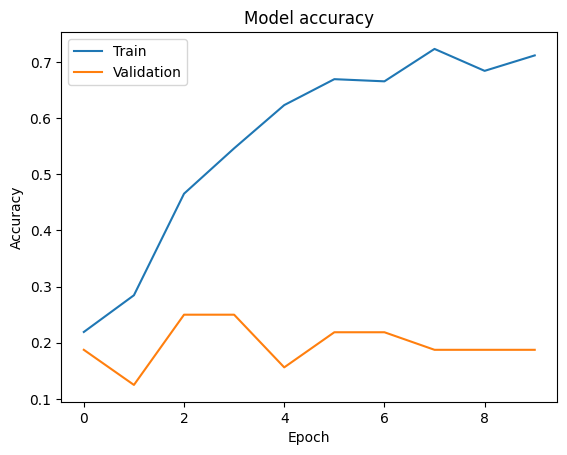

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

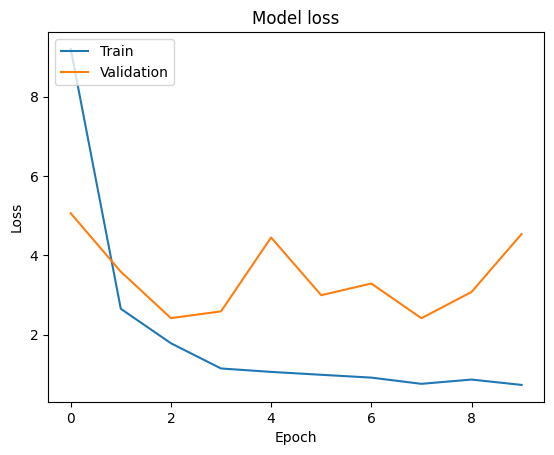

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/saved models/skin_model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
